In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, f_oneway, bartlett, kruskal
from scikit_posthocs import posthoc_dunn

# Exploring Datasets

In [5]:
salary = pd.read_csv("Datasets/job_salary.csv")
skills = pd.read_csv("Datasets/common_job_skills.csv")
job_df = pd.read_csv('Datasets/US_job_postings.csv', parse_dates=['last_processed_time', 'first_seen'])

In [6]:
salary.describe()

,min_salary,max_salary,ave_salary
count,3919.000000,2215.000000,3919.000000
mean,120299.428732,181406.077472,131788.243225
std,56429.574869,69226.655437,64141.422019
min,0.000000,0.000000,0.000000
25%,71816.500000,130150.000000,78592.800000
50%,120000.000000,188500.000000,126880.000000
75%,161900.000000,225300.000000,180000.000000
max,393000.000000,678910.000000,457000.000000


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job_link    12217 non-null  object 
 1   min_salary  3919 non-null   float64
 2   max_salary  2215 non-null   float64
 3   ave_salary  3919 non-null   float64
dtypes: float64(3), object(1)
memory usage: 381.9+ KB


In [8]:
skills.head()

,skill,counts
0,python,4440
1,sql,4397
2,data analyst,3417
3,data visualization,2328
4,problemsolving,2319


In [9]:
job_df.head()

,job_link,last_processed_time,first_seen,job_title,company,job_city,state,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00:00,2024-01-14,AI & ML Engineer,Jobs for Humanity,New Haven,CT,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00:00,2024-01-14,AI & ML Engineer,Aurora,San Francisco,CA,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00:00,2024-01-14,Data Warehouse Engineer,Adame Services LLC,New York,NY,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00:00,2024-01-12,Data Warehouse Engineer,Morph Enterprise,Harrisburg,PA,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00:00,2024-01-14,Data Engineer,Dice,Plano,TX,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


In [10]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   job_link             10291 non-null  object             
 1   last_processed_time  10291 non-null  datetime64[ns, UTC]
 2   first_seen           10291 non-null  datetime64[ns]     
 3   job_title            10291 non-null  object             
 4   company              10291 non-null  object             
 5   job_city             9950 non-null   object             
 6   state                10291 non-null  object             
 7   search_city          10291 non-null  object             
 8   search_country       10291 non-null  object             
 9   search_position      10291 non-null  object             
 10  job_level            10291 non-null  object             
 11  job_type             10291 non-null  object             
dtypes: datetime64[ns, 

In [11]:
job_df.describe(include='all')

C:\Users\hoang\AppData\Local\Temp/ipykernel_11056/2077832336.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  job_df.describe(include='all')


,job_link,last_processed_time,first_seen,job_title,company,job_city,state,search_city,search_country,search_position,job_level,job_type
count,10291,10291,10291,10291,10291,9950,10291,10291,10291,10291,10291,10291
unique,10291,4979,6,17,3157,1416,60,683,1,648,2,3
top,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-19 09:45:09.215838+00:00,2024-01-13 00:00:00,Data Engineer,Jobs for Humanity,New York,CA,Austin,United States,Data Entry Clerk,Mid senior,Onsite
freq,1,5313,4059,2233,727,280,1340,172,10291,877,9177,10266
first,NaN,2024-01-19 09:45:09.215838+00:00,2024-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2024-01-21 17:37:07.790936+00:00,2024-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = job_df.merge(salary, how='left', on='job_link' )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 0 to 10290
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   job_link             10291 non-null  object             
 1   last_processed_time  10291 non-null  datetime64[ns, UTC]
 2   first_seen           10291 non-null  datetime64[ns]     
 3   job_title            10291 non-null  object             
 4   company              10291 non-null  object             
 5   job_city             9950 non-null   object             
 6   state                10291 non-null  object             
 7   search_city          10291 non-null  object             
 8   search_country       10291 non-null  object             
 9   search_position      10291 non-null  object             
 10  job_level            10291 non-null  object             
 11  job_type             10291 non-null  object             
 12  min_salary        

# EDA

- What are the most popular jobs in the data field?
- What is the average salary for positions in the data field?
- Which regions show the highest job growth?
- Which regions pay the highest for data-related jobs?  
- What are some commonly required skills for the jobs?


In [13]:
def barh_plot(y, x, ylabel=None, xlabel=None, title=None):
    '''
        This function creates a horizontal bar plot with title, axis lables and data labels.
    '''
    plt.figure(figsize=(10, 6))    
    # Create a horizontal bar plot
    bars = plt.barh(y[::-1], x[::-1], color='teal')
    
    for bar in bars:
        # Get the bar's position
        width = bar.get_width() 
        label_x_position = width*1.02   
        # Label each bar with the corresponding value
        plt.text(label_x_position, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', color='red')
    
    # Create x,y-labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(alpha=0.5, linestyle='-', axis='both')
    plt.show()

## Popular Jobs in the Data Field

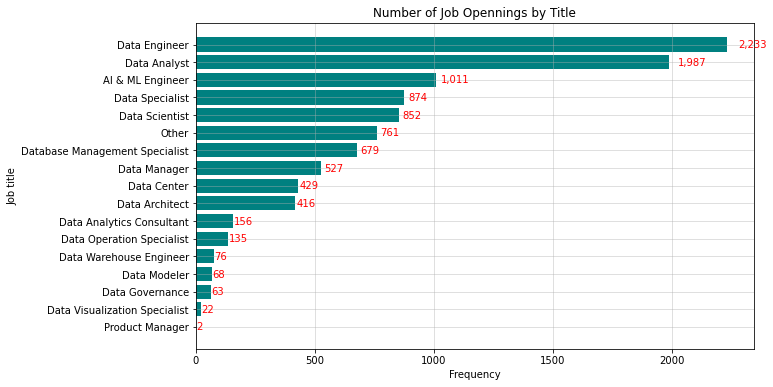

In [62]:
# Filter the data by the job titles
job_counts = df.groupby("job_title").size().sort_values(ascending=False)

# Create the barh plot
barh_plot(job_counts.index, job_counts.values, ylabel='Job title', xlabel='Frequency', title='Number of Job Opennings by Title')


## Median Salary across Job Position

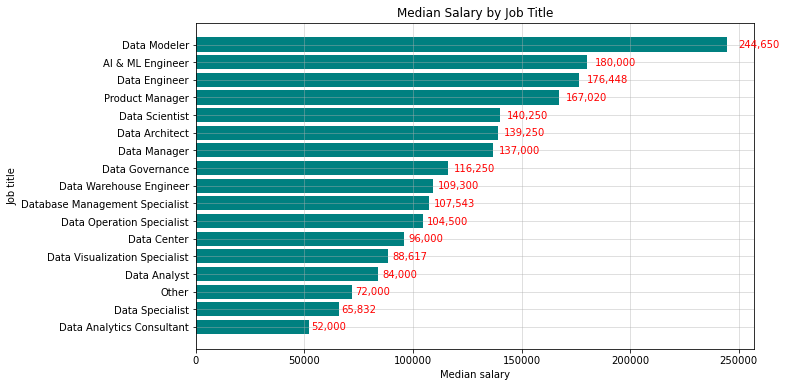

In [15]:
median_salary = df.groupby("job_title").ave_salary.median().sort_values(ascending=False)
barh_plot(median_salary.index, median_salary.values, ylabel='Job title', xlabel='Median salary', title='Median Salary by Job Title')


## Top 15 States with the Highest Job Growth

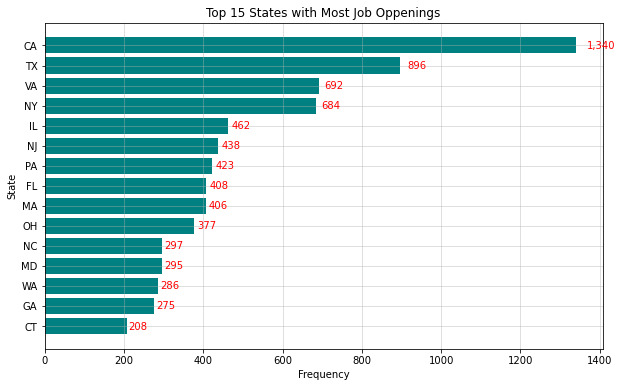

In [16]:
job_states = df.groupby('state').size().nlargest(15)
barh_plot(job_states.index, job_states.values, ylabel='State', xlabel='Frequency', title='Top 15 States with Most Job Oppenings')


## Median Salary of the 15 States with the Highest Job Growth 

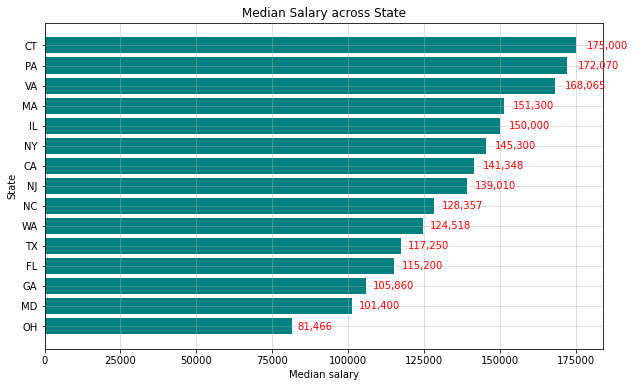

In [17]:
median_salary_state = df.loc[df.state.isin(job_states.index)].groupby("state").ave_salary.median().sort_values(ascending=False)
barh_plot(median_salary_state.index, median_salary_state.values, ylabel='State', xlabel='Median salary',
          title='Median Salary across State')



## Job Openings by Level

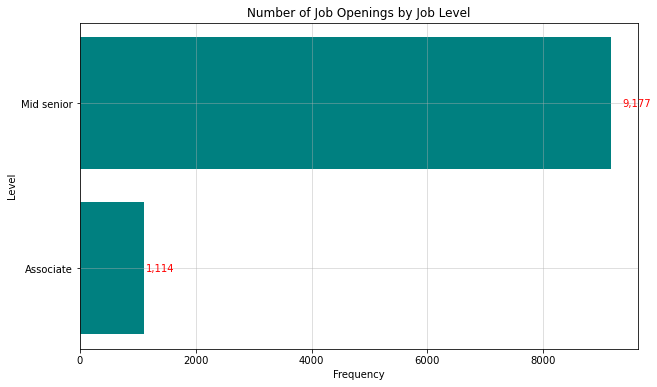

In [18]:
job_level = df.groupby('job_level').size().sort_values(ascending=False)
barh_plot(job_level.index, job_level.values, ylabel='Level', xlabel='Frequency', title='Number of Job Openings by Job Level')

## Median Salary by Level

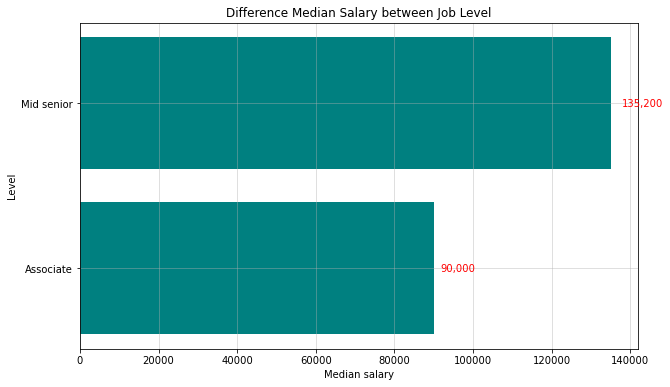

In [19]:
mean_salary_level = df.groupby('job_level').ave_salary.median().sort_values(ascending=False)
barh_plot(mean_salary_level.index, mean_salary_level.values, 
          ylabel='Level', xlabel='Median salary', title='Difference Median Salary between Job Level')


## Job Openings by Company

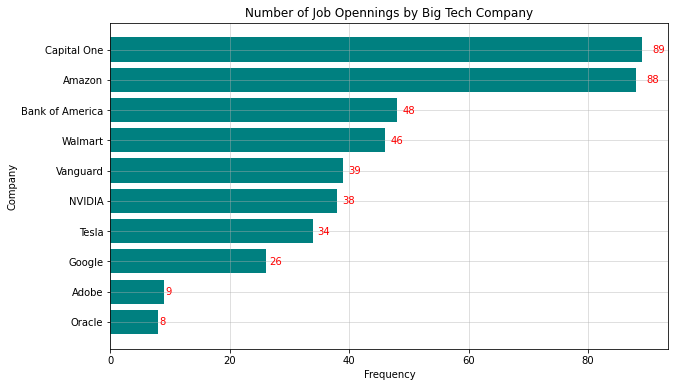

In [20]:
big_com = ['tesla', 'google', 'amazon', 'adobe', 'nvidia', 'oracle', 'vanguard', 'bank of america',
           'capital one', 'walmart', 'apple', 'meta', 'microsoft']
big_com_df = df.copy()
big_com_df.loc[big_com_df.company.str.lower().str.contains('amazon'), 'company'] = 'Amazon'
big_com_df = big_com_df.loc[big_com_df.company.str.lower().isin(big_com)]

big_com_job_counts = big_com_df.groupby("company").size().sort_values(ascending=False)
barh_plot(big_com_job_counts.index, big_com_job_counts.values, ylabel='Company', 
          xlabel='Frequency', title='Number of Job Opennings by Big Tech Company')

## Median Salary by Company

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


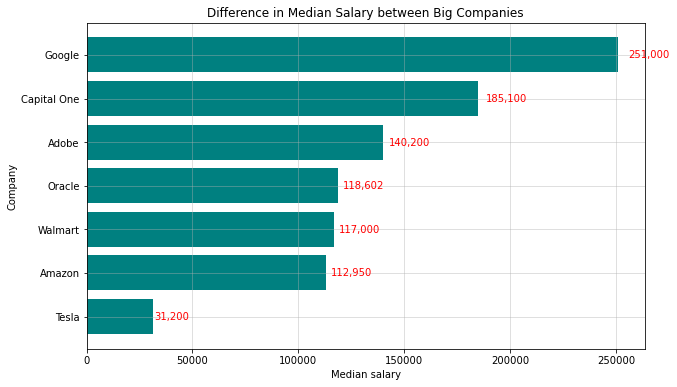

In [21]:
big_com_median_salary = big_com_df.groupby("company").ave_salary.median().sort_values(ascending=False)
barh_plot(big_com_median_salary.index, big_com_median_salary.values, ylabel='Company', 
          xlabel='Median salary', title='Difference in Median Salary between Big Companies')

Due to the numerous missing values in salary.

## Job Openings by Company and Title

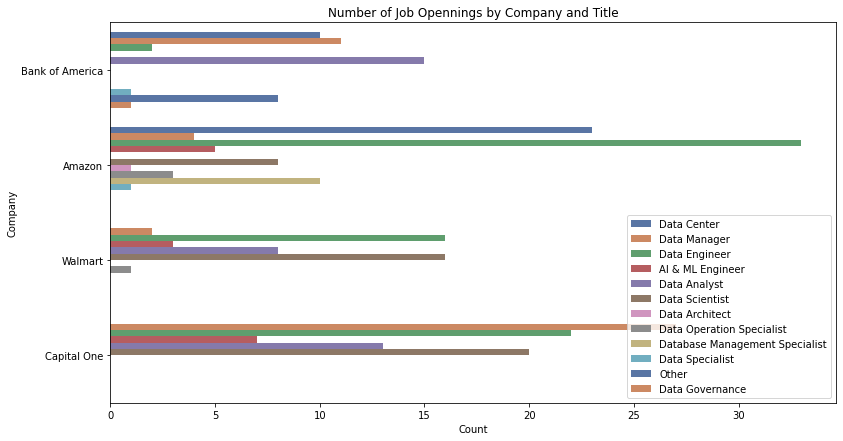

In [22]:
plt.figure(figsize=(13,7))
sns.countplot(data=big_com_df.query("company in ['Capital One', 'Amazon', 'Walmart', 'Bank of America']"), 
              y='company', hue='job_title', palette='deep')
plt.legend(loc='lower right', title=None)
plt.xlabel("Count")
plt.ylabel("Company")
plt.title("Number of Job Opennings by Company and Title")
plt.show()

## Most Common Essential Skills

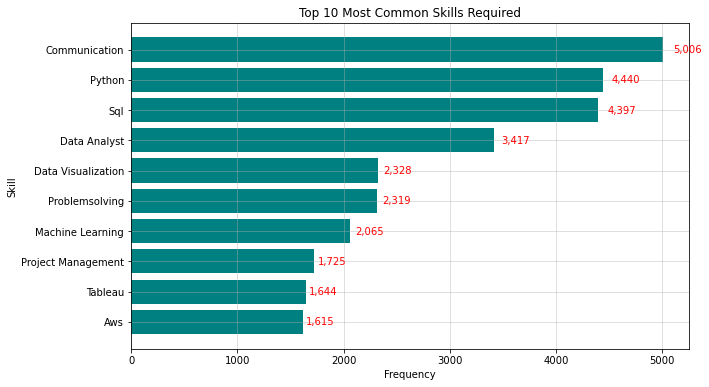

In [23]:
skills['skill'] = skills['skill'].str.title()
top10_skills = skills.nlargest(10, 'counts').reset_index(drop=True)
barh_plot(top10_skills.skill, top10_skills.counts, ylabel='Skill', 
          xlabel='Frequency', title='Top 10 Most Common Skills Required')

In [24]:
def pie_chart_plot(skill_list, df=skills): 
    '''
        This function generates a pie chart displaying specified skills and their relative proportions        
    '''
    # Create a dictionary to store the skills and their frequency
    skill_dict = {}
    for sk in skill_list:
        skill_dict[sk] = df.loc[df.skill == sk, 'counts'].values[0]
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    wedges, texts, autotexts = ax.pie(skill_dict.values(), 
                                       labels=skill_dict.keys(),                                       
                                       colors=sns.color_palette('pastel'),
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       explode=(0.05,)*len(skill_dict), 
                                       shadow=True)
    
    # Create legend labels with frequencies
    legend_labels = [f'{skill}: {count}' for skill, count in skill_dict.items()]
    # Add legends
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0, 1))
    # Format displayed text
    plt.setp(autotexts, size=14, weight='bold')
    plt.setp(texts, size=10,)
    
    title = ' vs. '.join([skill for skill in skill_list])
    plt.title(title, fontsize=16, color='red')
    plt.axis('equal')
    plt.show()

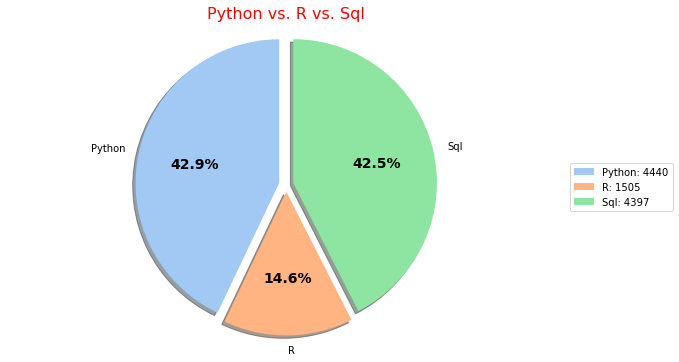

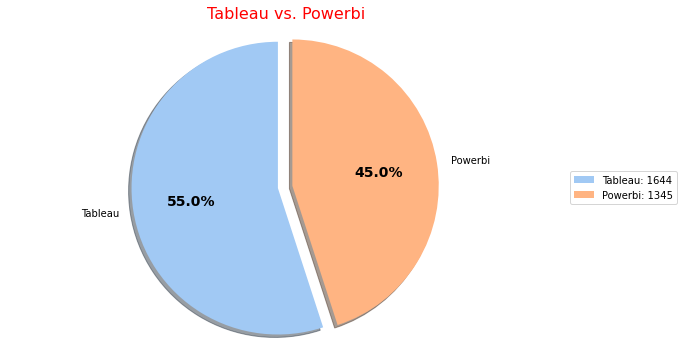

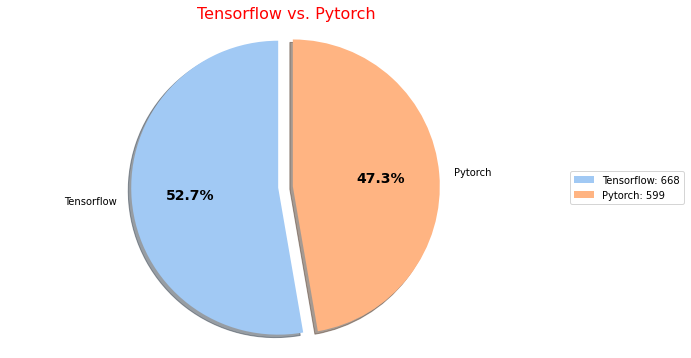

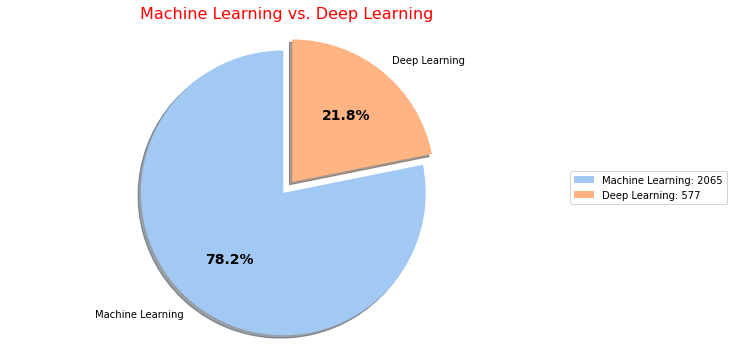

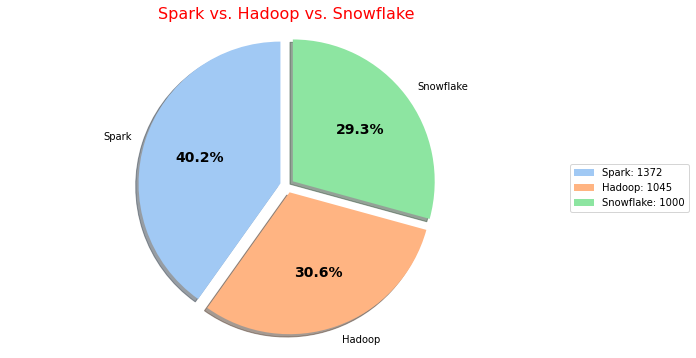

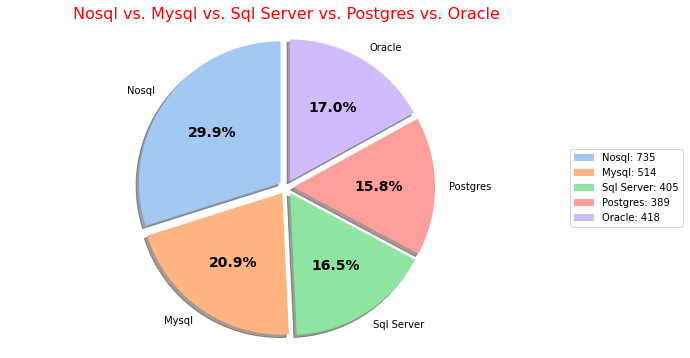

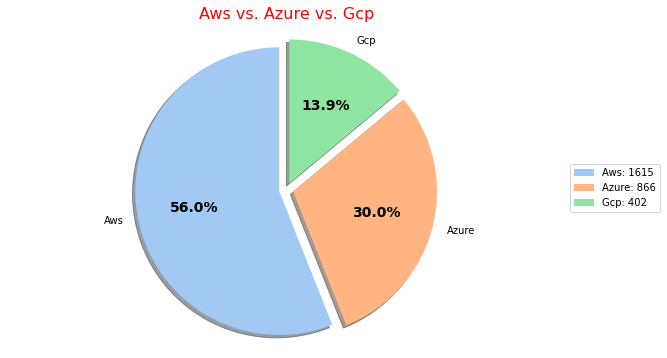

In [25]:
compared_skills = [('Python', 'R', 'Sql'),
                   ('Tableau', 'Powerbi'),
                   ('Tensorflow', 'Pytorch'),
                   ('Machine Learning', 'Deep Learning'),
                   ('Spark', 'Hadoop', 'Snowflake'),
                   ('Nosql', 'Mysql','Sql Server', 'Postgres', 'Oracle'),
                   ('Aws', 'Azure', 'Gcp')]
for skill_group in compared_skills:
    pie_chart_plot(skill_group)

A few insights gained from data visualization phase:

- Data Engineer is the most in-demand position with over 2,200 job openings.

- The position that has the greatest median salary is Data Modeler at $244,650, but there are 63 vacancies for this role. 

- California is the highest job growth with more than 1,300 job opportunies, but its median salary ranks only within the top 7.

- Most jobs are seeking cancidates at the Mid Senior level rather than the Associate level, and it'll make sense that the median salary for the Mid Senior level is $40,000 higher than that for the Associate level.

- Among some large companies, Capital One and Amazon stand out as the most active companies, with 89 and 88 job openings orespectively, significant more than other companies. Google has the highest median salary at $251,000, followed by Capital One.

- Each company tends to focus on different positions. For example, Bank of America is seeking more Data Analyst while Amazon is hiring more Data Engineer. Walmart needs both Data Engineer and Data Scientist, while Capital One has many job openings for Data Manager.
Communication skills are the most commonly required in the data-related job market, followed by two programming skills which are Python and SQL.

- In some comparisons of skills, it shows that among three programming languages used in the data field, Python and SQL are more popular than R. Regarding data visualization tools, Tableau is slightly more recognized than Power BI. It seems like there is just little difference in usage between two machine learning platforms: Tensorflow and Pytorch. Spark is a little better-known big data tool compared to Snowflake and Hadoop. Among five different database management system Nosql, Mysql, Sql Server, Postgres and Oracle, Nosql is more in demand than the others, while the remaining four have simirlar popularity in the market. For cloud platforms, AWS skills are significantly more needed, followed by Azure.

# Hypothesis Testing for the Difference in Salary Means


In [26]:
salary_df = df.dropna(subset=['ave_salary'])
print(f'There are only {salary_df.shape[0]} ({salary_df.shape[0]/df.shape[0]*100:.0f}%)',  
    'salary data points out of the entire dataset.')

There are only 3734 (36%) salary data points out of the entire dataset.


We'll perform hypotheses to compare the difference in salary between
- Job level: Mid Senior vs Associate
- Three job titles: Data Scientist, Data Engineer and AI & ML Engineer
- Three states: CA, NY and TX  

from the subset sample `salary_df` to make some informed conclusions about the salary of the entire dataset.

Firstly, let's take a look at the distribution of the salary.

In [27]:
# Create a function to plot a histogram of a given data
def histogram_plot(data=salary_df, x='ave_salary', hue=None):
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, 
                     x='ave_salary',
                     hue=hue, kde=True)
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    if hue != None:
        plt.title(f"Salary Distribution by {' '.join(hue.split('_')).title()}")
    else:
        plt.title("Distribution of Salary")
    plt.show()

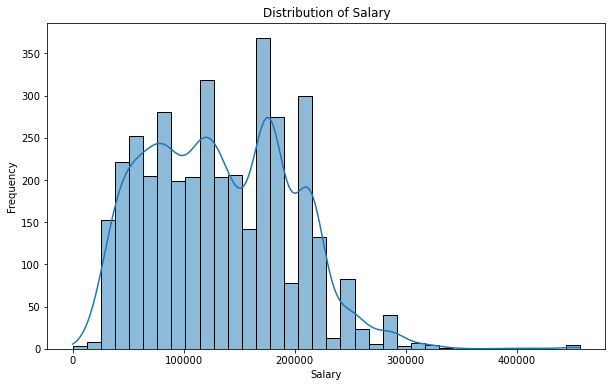

In [28]:
histogram_plot()

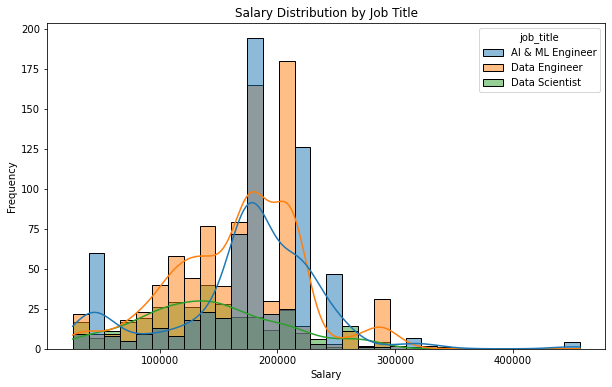

In [29]:
tested_titles = ['Data Engineer', 'Data Scientist', 'AI & ML Engineer']
histogram_plot(data=salary_df.loc[salary_df.job_title.isin(tested_titles)], hue='job_title')

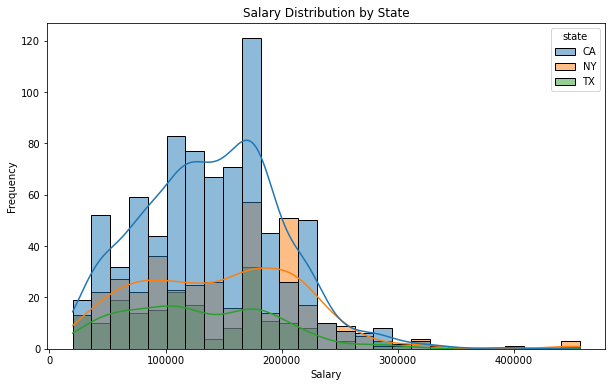

In [30]:
tested_states = ['CA', 'NY', 'TX']
histogram_plot(data=salary_df.loc[salary_df.state.isin(tested_states)], hue='state')

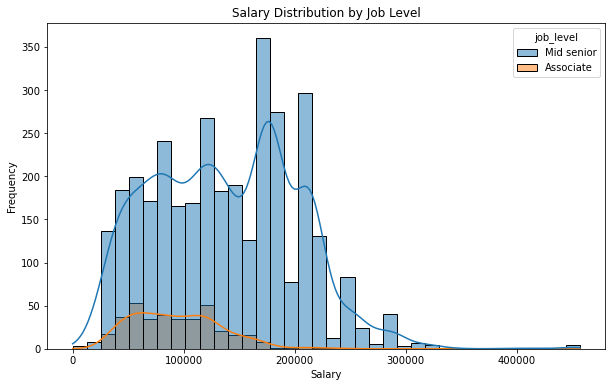

In [31]:
histogram_plot(data=salary_df, hue='job_level')

In [32]:
# Empirical cumulative distribution function
def ecdf(data):
    '''
        This function computes the Empirical Cumulative Distribution Function for a given data.
        
        Parameters
        ----------
        data: (array) a list of numeric values
        
        Return
        ------
        x: (numpy array) an array of sorted values
        y: (numpy array) an array of cumulative proportions corresponding to the sorted data values.
    '''
    n = len(data)
    # Sort the data    
    x= np.sort(data)
    
    # Generate the corresponding y 
    y = np.arange(1, n+1)/n      # Representing the cumulative proportion of the data points
    
    return x, y

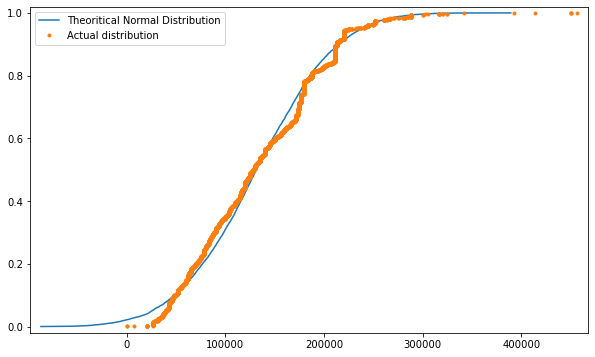

In [33]:
# Compare the salary data to a normal probability density function
mean = np.mean(salary_df.ave_salary)
std = np.std(salary_df.ave_salary)

# Create a normally distributed sample 
samples = np.random.normal(loc=mean, scale=std, size=10000)

# Generate x and y from the normal sample
x_theory, y_theory = ecdf(samples)
# Generate x and y from the actual sample
x, y = ecdf(salary_df['ave_salary'])

plt.figure(figsize=(10,6))
plt.plot(x_theory, y_theory)
plt.plot(x, y, marker='.', linestyle='none')
plt.legend(labels=['Theoritical Normal Distribution', 'Actual distribution'], loc='upper left')
plt.margins(0.02) 
plt.show()

As shown in the histogram plot, the distribution of the salary is roughly normal, and also the two CDF curves overlaps, so it seems like the salary may follow a normal distribution.

## Traditional Methods for Independent Samples

Since the sample roughly follows a normal distribution, we can use:

- Two-sample t-test for the difference in salary between `Mid Senior` and `Associate` levels
- One-way ANOVA test for the difference in salary between three job titles: `Data Engineer`, `Data Scientist`, `AI & ML Engineer`
- One-way ANOVA test for the difference in salary between three states: `CA`, `NY`, `TX`

We'll the significance level **$\alpha$ = 5%** for all the tests. 



### Is the salary of the Mid Senior level greater than that of the Associate levels?
We'll conduct a hypothesis testing to determine if the difference is statistically different or could have occurred by chance.



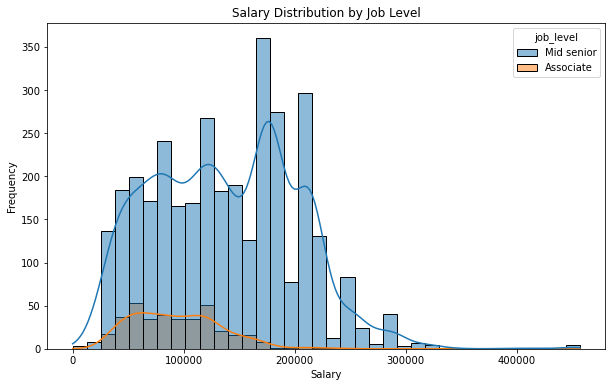

In [34]:
histogram_plot(data=salary_df, hue='job_level')

The salary distributions of each job level are really different from each other and approximately follow a normal distribution, so we can use an **independent two-sample t-test** to test if the difference is statistically significant.

In [35]:
mid_senior_sal = salary_df.loc[salary_df.job_level == 'Mid senior', 'ave_salary']
associate_sal = salary_df.loc[salary_df.job_level == 'Associate', 'ave_salary']
print(f'The sample size of the Mid senior level: {mid_senior_sal.shape[0]}.')
print(f'The sample size of the Associate level: {associate_sal.shape[0]}.')

The sample size of the Mid senior level: 3368.
The sample size of the Associate level: 366.


Since the two sample sizes are significantly different, we'll use **Welch's t-Test** instead of **Student's t-test** since the **Welch's t-test** is more reliable when the two samples have different sample sizes and unequal variances.

Use **ttest_ind** function from **scipy.stats** module to perform an independent two-sample t-test.

The null and alternative hypotheses:  
            $~~~~~H_0: \mu_1 \le \mu_2 \newline$ 
            $~~~~~H_a: \mu_1 > \mu_2. (claim)$

In [36]:
t_statistic, p_value = ttest_ind(mid_senior_sal, associate_sal,
                                  equal_var=False,    # Set this to False to perform the Welch's t-test
                                  alternative='greater') # Indicate the right-tailed test.
print(f'p-value: {p_value:.3f}')

p-value: 0.000


Since p-value is very small, we can reject the null hypothesis. Therefore, at 5% level of significance, there is sufficient evidence to support the claim that the Mid senior level's average salary is statistically greater than the Associate level's average salary.

Although it seems obvious that the average salay of the Mid senior level is greater than that of the Associate level at first, performing a hypothesis testing can still help quantity the salary difference between the two job titles and determine whether the difference is statistically different or due to chance.

### Is there a difference in salary between Data Engineer, Data Scientist and AI & ML Engineer?
These are three common jobs in the data field, each requiring different skill sets and focusing on different problems. Given the differences, we can assume that the salaries of the three job positions significantly vary, and perform a hypothesis testing to test the assumption.

In [37]:
ds_sal = salary_df.loc[salary_df.job_title == 'Data Scientist', 'ave_salary']
ai_ml_sal = salary_df.loc[salary_df.job_title == 'AI & ML Engineer', 'ave_salary']
de_sal = salary_df.loc[salary_df.job_title == 'Data Engineer', 'ave_salary']

print(f'The sample size of Data Scientist: {ds_sal.shape[0]}.')
print(f'The sample size of AI & ML Engineer: {ai_ml_sal.shape[0]}.')
print(f'The sample size of Data Engineer: {de_sal.shape[0]}.')


The sample size of Data Scientist: 333.
The sample size of AI & ML Engineer: 679.
The sample size of Data Engineer: 860.


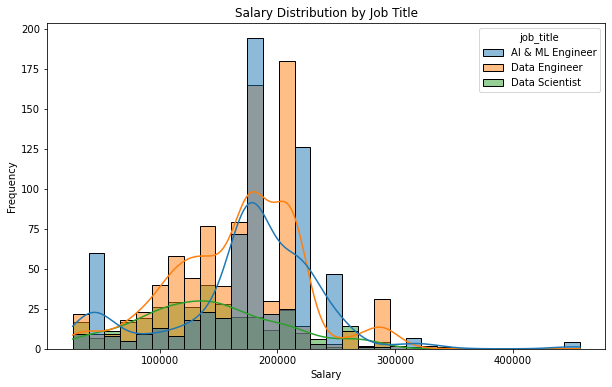

In [38]:
tested_titles = ['Data Engineer', 'Data Scientist', 'AI & ML Engineer']
histogram_plot(data=salary_df.loc[salary_df.job_title.isin(tested_titles)], hue='job_title')

The salary distribution of each title is roughly similar to each other and approximately normally distributed. We can perform a **One-way ANOVA** test for the difference in the mean salary between the three job titles.

However, since the sample sizes are significantly different, it can lower the statistical power of the ANOVA test, which makes the test less reliable. 

That being said, it's possible to perform a one-way ANOVA with unequal sample sizes if the assumption of equal variances is not violated. This assumption is important to ensure the validity and accuracy of the ANOVA tests. Thus, if we have unequal sample sizes and unequal variances between samples, a ANOVA test may not be efficient and reliable.

In short, a strategy to deal with this problem can be expressed in pseudocode  as follows:
- Determine if all the groups have (approximately) the same variances. The **Bartlett's test** and **Levene's test** can help with this.
    - If NO, perform **Kruskal-Wallis test** which is a non-parametric test equivalent to a one-way ANOVA.
    - If YES, continue to determine if all the groups have (approximately) normal distribution.
        - If YES, we can perform the ANOVA
        - If NO, perform the Kruskal-Wallis test
- If the difference is statistically significant, perform a post hoc test such as **Tukey’s Honestly Significant Difference** (after ANOVA test) or **Dunn's test** (after Kruskal-Wallis test) to determine which groups are different.
      


As mentioned earlier, the salary distributions of all job positions are roughly normal, we first perform a Bartlett's test for the equal variances assumption.

In [39]:
test_statistic, p_value = bartlett(ds_sal, ai_ml_sal, de_sal)
print(f'p-value = {p_value:.3f}')

p-value = 0.000


Since the p-value is very small compared to $\alpha=0.05$, the assumption of equal variances is not met. So we'll perform the Kruskal-Wallis test instead of the ANOVA.

The null and alternative hypothesis:  
    $~~~~H_0$: The distributions of salary of the three job positions are the same.   
    $~~~~H_a$: The distributions of salary of the three job positions are different for at least one position. (claim)

In [40]:
test_statistic, p_value = kruskal(ds_sal, ai_ml_sal, de_sal)
print(f"p-value = {p_value:.3f}")

p-value = 0.000


Since the p-value is very small, we reject the null hypothesis and conclude that there is sufficient evidence to support the claim that the salary of each job position is statistically different for at least one position.

Next, perform a Dunn's test to determine which specific groups are different.

In [41]:
# Create a function to perform a Dunn's test and display the result
def dunn_test(data, groups, target='ave_salary', alpha=0.05):
    '''
        This function performs a Dunn's test for multiple comparisons.
        
        Parameters
        ----------
        data: (DataFrame) a DataFrame object containing the data for testing.
        groups: (str) name of the data column containing independent variable values.
        target: (str) name of the data column containing dependent variable values.
        alpha: (float) the level of significance, 5% by default.
        
        Return
        ------
        No explict return. Display a table of p-values for each pairwise comparison. 
        Print out group pairs that are statistically different based on the specified significance level.
    '''
    dunn_result = posthoc_dunn(data, group_col=groups, val_col=target)
    display(dunn_result)
    print('-'*60)
    for i in range(len(dunn_result.index)):
        for j in range(i+1, len(dunn_result.columns)):
            group1 = dunn_result.index[i]
            group2 = dunn_result.columns[j]
            if dunn_result.loc[group1, group2] <= alpha:
                print(f'{group1} and {group2} are statistically different.')

In [42]:
dunn_test(salary_df.query('job_title in ["Data Scientist", "Data Engineer", "AI & ML Engineer"]'),
          groups='job_title')


,AI & ML Engineer,Data Engineer,Data Scientist
AI & ML Engineer,1.000000e+00,5.665996e-05,8.046358e-22
Data Engineer,5.665996e-05,1.000000e+00,1.503889e-11
Data Scientist,8.046358e-22,1.503889e-11,1.000000e+00


------------------------------------------------------------
AI & ML Engineer and Data Engineer are statistically different.
AI & ML Engineer and Data Scientist are statistically different.
Data Engineer and Data Scientist are statistically different.


### Is there a difference in salary between the three states CA, TX and NY?

California, Texas and New York are widely recognized as the three most popular states for tech jobs in the U.S. Let's examine their salary data to see if there is a significant difference in salary between those states.

The same process as the previous one can be applied in this case.

In [43]:
CA_sal = salary_df.loc[salary_df.state == 'CA', 'ave_salary']
TX_sal = salary_df.loc[salary_df.state == 'TX', 'ave_salary']
NY_sal = salary_df.loc[salary_df.state == 'NY', 'ave_salary']

print(f'The sample size of CA: {CA_sal.shape[0]}.')
print(f'The sample size of TX: {TX_sal.shape[0]}.')
print(f'The sample size of NY: {NY_sal.shape[0]}.')

The sample size of CA: 785.
The sample size of TX: 190.
The sample size of NY: 382.


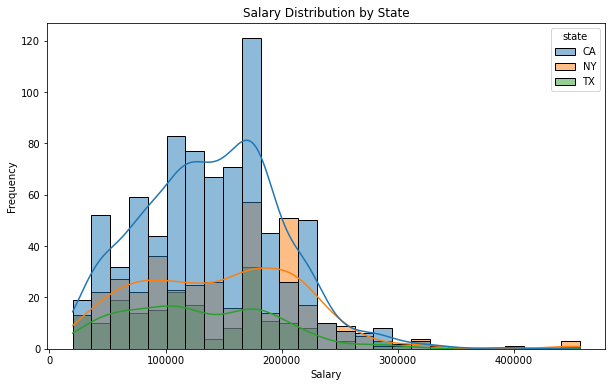

In [44]:
tested_states = ['CA', 'NY', 'TX']
histogram_plot(data=salary_df.loc[salary_df.state.isin(tested_states)], hue='state')

Since the sample sizes are different, the same process used earlier can be applied in this case.

In [45]:
test_statistic, p_value = bartlett(CA_sal, TX_sal, NY_sal)
print(f'p-value = {p_value:.3f}')

p-value = 0.001


p-value = 0.001 < $\alpha$ = 0.05, so the variances of the three samples are statistically different. A one-way ANOVA test would not be sufficient in this case. We'll thus perform a Kruskal-Wallis test to determine if there is a diffence in salary between the three states.

The null and alternative hypothesis:  
    $~~~~H_0$: The distributions of salary of the three states are the same.   
    $~~~~H_a$: The distributions of salary of the three states  are are different in at least one state. (claim)

In [46]:
test_statistic, p_value = kruskal(CA_sal, TX_sal, NY_sal)
print(f"p-value = {p_value:.3f}")

p-value = 0.007


Since p-value = 0.007 < $\alpha$ = 0.05, we can reject the null hypothesis. We can conclude that at 5% level of significance there is enough evidence to support the claim that the distributions of salary of the three states are different in at least one state.

Next, we'll perform a Dunn's test to specifically determine which states are different.

In [47]:
dunn_test(salary_df.query('state in ["CA", "TX", "NY"]'),
          groups='state')

,CA,NY,TX
CA,1.000000,0.185516,0.014533
NY,0.185516,1.000000,0.001599
TX,0.014533,0.001599,1.000000


------------------------------------------------------------
CA and TX are statistically different.
NY and TX are statistically different.


## Bootstrapping and Permutation Testing

Bootstrapping and Permutation Testing are two common resampling techniques used in statistics for constructing confidence intervals and hypothesis testing. Their main advantage over the traditional methods is that no assumption of the sample distribution such as normal distribution has to be made. However, they rely heavily on computing power.

Some differences between the two techniques:

|Bootstrapping|Permutation Testing|
|-----|-----|
|Resample with replacement|Resample without replacement|
|Best for constructing confidence intervals, but can also be used for hypothesis testing|More efficient for hypothesis testing|

  
- **A two-sample Bootstrapping Hypothesis Process:**
   1. Combine the two given samples and calculate the mean of the combined sample.  
   2. Generate shifted samples for both given samples using the formular $s_i'=s_i-\bar{s}+\bar{\bar{s}}$ where $\bar{s}$ and $\bar{\bar{s}}$ are the mean of each sample and the mean of the combined sample.  
   3. Draw a random sample from each new sample with the same sample size.  
   4. Calculate the test statistic called bootstrap replicate, which is the mean in this case.
   5. Repeat step 3 and 4 multiple times, 10,000 times for example.  
   6. Calculate the p-value based on the alternative hypothesis.  
    
 - **A two-sample Permutation Testing Process:**
   1. Combine the two given samples and shuffle the combined sample.
   2. Split the permuted sample into two new samples with the same sizes as the original samples.
   3. Compute the mean of each new sample.
   4. Compute the test statistic call permutation replicates which is the difference of the means of two new samples.
   5. Repeat the whole process multiple times, say 10,000 times.
   6. Calculate the p-value based on the alternative hypothesis
   
 
We'll create some reuseable functions to draw boostrap distribution and permutation distribution, and to calculate p-value from the resampling distribution.

In [48]:
# Create a function to draw boostrap replicates
def boot_diff(sample1, sample2, func=np.mean, size=10000):
    '''
        This function generates an array of bootstrap replicates with the specified size and a given statistical function.
        
        Parameters
        ----------
        sample1: (array) A list containing the original data of the first sample.
        sample2: (array) A list containing the original data of the second sample.
        func: a function to compute the test statistic.
        size: (int) an integer specifying the number of replicates
        
        Return
        ------
        A numpy array containing the bootstrap replicates
    '''
    # initialize the list for holding the bootstrap replicates
    bs_replicates = np.empty(size)
    
    # Concatenate the two samples
    combined_samp = np.concatenate((sample1, sample2))
    
    # Shift both samples to have the same means under the null hypothesis
    sample1_shifted = sample1 - np.mean(sample1) + np.mean(combined_samp)
    sample2_shifted = sample2 - np.mean(sample2) + np.mean(combined_samp)
    
    # iterate for the specified number of bootstrapping iterations
    for i in range(size):
        # create the resampled sets of data of the original lengths (WITH REPLACEMENT)
        bs_sample1 = np.random.choice(sample1_shifted, len(sample1_shifted))
        bs_sample2 = np.random.choice(sample2_shifted, len(sample2_shifted))
        
        # compute the BS replicate using the specified base statistical function and append it to the list of BS replicates
        bs_replicates[i] = func(bs_sample1) - func(bs_sample2)
        
    return bs_replicates


# Create a function to draw permutation replicates
def perm_diff(sample1, sample2, func=np.mean, size=10000):
    '''
        This function generates an array of permutation replicates with the specified size and a given statistical function.
        
        Parameters
        ----------
        sample1: (array) A list containing the original data of the first sample.
        sample2: (array) A list containing the original data of the second sample.
        func: a function to compute the test statistic.
        size: (int) an integer specifying the number of replicates
        
        Return
        ------
        A numpy array containing the permutation replicates
    '''
    # initialize the list for the test statistic replicate
    perm_replicates = np.empty(size)
    
    # iterate for the specified number of iterations
    for i in range(size):
        # concatenate the two samples into one
        samples_app = np.concatenate((sample1, sample2))
        
        # permute the entire appended set (making this complete combined resampling WITHOUT REPLACEMENT)
        samples_perm = np.random.permutation(samples_app)
        
        # create the hypothesized samples by:
        #  pretending that the first len(sample_1) elements is the first sample
        perm_sample1 = samples_perm[:len(sample1)]
        
        #  and the rest is the second sample
        perm_sample2 = samples_perm[len(sample1):]
        
        # compute the test statistic replicate and append it to the list of permutation replicates
        perm_replicates[i]= func(perm_sample1) - func(perm_sample2)
        
    return perm_replicates

# Create a function to calculate p-value from the bootstrap replicates
def compute_pvalue(reps, emp_diff_mean, alternative='two-sided'):
    '''
        This function calculates the p-value nd a given statistical function.
        
        Parameters
        ----------
        reps: (array) A list containing the resampling data 
        emp_diff_mean: (int) the empirical difference of the mean of two given samples. 
        alternative: (str) the type of the hypothesis test: 'two-sided' (default), 'less', or 'greater'
        
        Return
        ------
        A float number which is the p-value associated with the given alternative.
    '''
    # The area under the normal curve to the left 
    p_left = np.mean(reps <= emp_diff_mean)
    
    # The area under the normal curve to the right 
    p_right = 1 - p_left
    
    # Right-tailed test
    if alternative == 'greater':
        return p_right
    # Left-tailed test
    elif alternative == 'less':
        return p_left
    # Two-tailed test
    elif alternative == 'two-sided':
        return min(p_left, p_right) * 2
    # Raise an error it's not in one of those tests
    else:
        raise  ValueError("alternative must be 'less', 'greater', or 'two-sided'.")


### Mid Senior's Mean Salary vs. Associate's Mean Salary

Earlier we used a Welch's test to determine if the Mid Senior level's mean salary is statistically greater than the Associate level's mean salary. In this section, we'll use resampling methods to test the same hypothesis. 

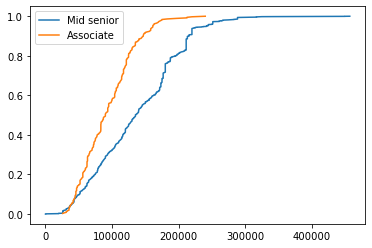

In [49]:
mid_senior_sal = salary_df.loc[salary_df.job_level == 'Mid senior', 'ave_salary']
associate_sal = salary_df.loc[salary_df.job_level == 'Associate', 'ave_salary']

senior_x, senior_y = ecdf(mid_senior_sal)
asso_x, asso_y = ecdf(associate_sal)

plt.plot(senior_x, senior_y, label='Mid senior')
plt.plot(asso_x, asso_y, label='Associate')
plt.legend()
plt.show()

From the ECDFs of both job levels, we can see the salary of the Mid Senior level is higher than that of the Associate level.

#### Bootstraping method

Empirical of difference of the sample means: 43816.94
P-value:  0.0


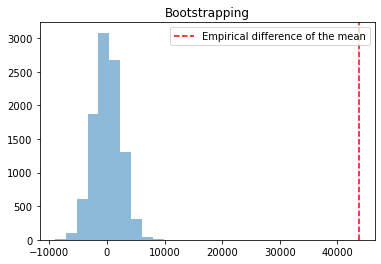

In [50]:
# Empirical difference of the means between two job levels
emp_diff_mean = np.mean(mid_senior_sal) - np.mean(associate_sal)

# Generate bootstrapping replicates
job_level_bs_reps = boot_diff(mid_senior_sal, associate_sal)

# Calculate p-value for the right-tailed test
p_value = compute_pvalue(job_level_bs_reps, emp_diff_mean, alternative='greater')

print(f'Empirical of difference of the sample means: {emp_diff_mean:.2f}')
print('P-value: ', p_value)

# Create a histogram plot of the bootstrap replicates
plt.hist(job_level_bs_reps, alpha=0.5)
plt.axvline(emp_diff_mean, color='red', linestyle='--', label='Empirical difference of the mean')
plt.title('Bootstrapping')
plt.legend()
plt.show()

The p-value for the right-tailed test is 0, indicating that we can reject the null hypothesis. That means there is sufficient evidence to support the claim that the salary of the Mid Senior level is statistically higher than that of the Associate level.

#### Permutation Testing

Empirical of difference of the sample means: 43816.94
P-value:  0.0


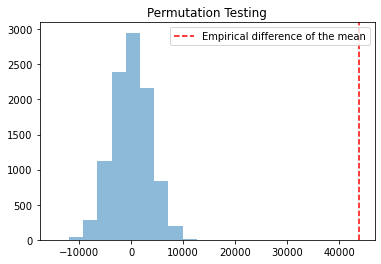

In [51]:
# Empirical difference of the means between two job levels
emp_diff_mean = np.mean(mid_senior_sal) - np.mean(associate_sal)

# Generate permutation replicates 
job_level_perm_reps = perm_diff(mid_senior_sal, associate_sal)

# Calculate p-value for the right-tailed test
p_value = compute_pvalue(job_level_perm_reps, emp_diff_mean, alternative='greater')
print(f'Empirical of difference of the sample means: {emp_diff_mean:.2f}')
print('P-value: ', p_value)

# Display the distribution of the permutation replicates
plt.hist(job_level_perm_reps, alpha=0.5)
plt.axvline(emp_diff_mean, color='red', linestyle='--', label='Empirical difference of the mean')
plt.legend()
plt.title("Permutation Testing")
plt.show()

The result is similar to the Bootstrapping. We can conclude the salary of the Mid Senior level is statistically higher than that of the Associate level.

#### Comparison

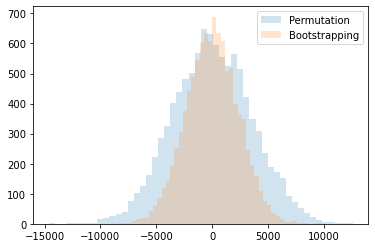

In [52]:
plt.hist(job_level_perm_reps, bins=50, alpha=0.2, label='Permutation')
plt.hist(job_level_bs_reps, bins=50, alpha=0.2, label='Bootstrapping')
plt.legend()
plt.show()

The permutation replicates' distribution is wider than the bootstrap replicates'. This could be because of the high variability of the data as shown in the ECDP plots.

### California's Mean Salary vs. New York's Mean Salary

In section 2.1.3, after performing a **Dunn's test**, we determine there is not a statistically significant difference in mean salary between CA and NY states. Now, we'll use resampling methods and test if we'll have the same result.

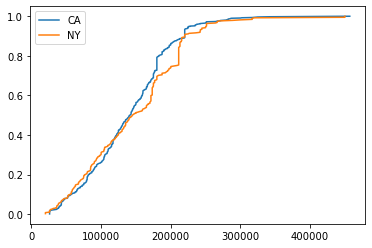

In [53]:
CA_sal = salary_df.loc[salary_df.state == 'CA', 'ave_salary']
NY_sal = salary_df.loc[salary_df.state == 'NY', 'ave_salary']

CA_x, CA_y = ecdf(CA_sal)
NY_x, NY_y = ecdf(NY_sal)

plt.plot(CA_x, CA_y, label='CA')
plt.plot(NY_x, NY_y, label='NY')
plt.legend()
plt.show()

The ECDF plots show that the salary of the two states are pretty close together.

#### Bootstrapping Method

Empirical of difference of the sample means: -6856.56
P-value:  0.1154


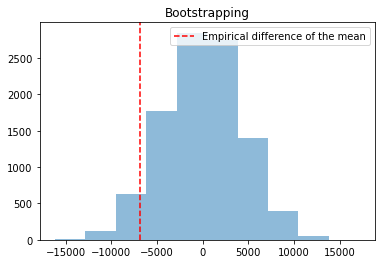

In [54]:
# Empirical difference of the means between two job levels
emp_diff_mean = np.mean(CA_sal) - np.mean(NY_sal)

# Generate bootstrapping replicates
state_bs_reps = boot_diff(CA_sal, NY_sal)

# Calculate p-value for the two-tailed test
p_value = compute_pvalue(state_bs_reps, emp_diff_mean, alternative='two-sided')

print(f'Empirical of difference of the sample means: {emp_diff_mean:.2f}')
print('P-value: ', p_value)

plt.hist(state_bs_reps, alpha=0.5)
plt.axvline(emp_diff_mean, color='red', linestyle='--', label='Empirical difference of the mean')
plt.legend()
plt.title("Bootstrapping")
plt.show()


The p-value is greater than the level of significance, we fail to reject the claim that there is not a statistically significant difference in mean salary between CA and NY states.

#### Permutation Testing

Empirical of difference of the sample means: -6856.56
P-value:  0.0918


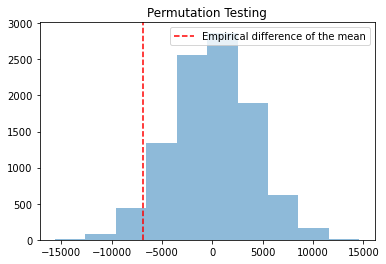

In [55]:
# Empirical difference of the means between two job levels
emp_diff_mean = np.mean(CA_sal) - np.mean(NY_sal)

# Generate permutation replicates
state_perm_reps = perm_diff(CA_sal, NY_sal)

# Calculate p-value for the two-tailed test
p_value = compute_pvalue(state_perm_reps, emp_diff_mean, alternative='two-sided')

print(f'Empirical of difference of the sample means: {emp_diff_mean:.2f}')
print('P-value: ', p_value)

plt.hist(state_perm_reps, alpha=0.5)
plt.axvline(emp_diff_mean, color='red', linestyle='--', label='Empirical difference of the mean')
plt.legend()
plt.title("Permutation Testing")
plt.show()


Pretty similar result with the p-value = 0.093.

#### Comparison


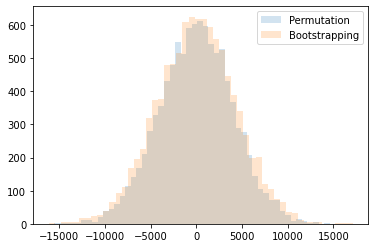

In [56]:
plt.hist(state_perm_reps, bins=50, alpha=0.2, label='Permutation')
plt.hist(state_bs_reps, bins=50, alpha=0.2, label='Bootstrapping')
plt.legend()
plt.show()

The two resampling distributions are almost the same in this case.

Summary:
- Through Welch's test, bootstrapping and permutation testing, we found evidence supporting the claim that the mean salary for the Mid Senior level is statistically greater than for the Associate level.

- The Bartlett's test and Kruskal-Wallis test specified that the distributions of the salary of the three positions - Data Engineer, Data Scientist and AI & ML Engineer - are statistically different for at least one position. Proceeding with a Dunn's test, we could determine that each pair of positions is different from each other.

- Similarly, the Bartlett's test and Kruskal-Wallis test determined that the means of the salary in three states - CA, TX, and NY - statistically differ in at least one state. After conducting a Dunn's test, we found that two state pair with statistically significant differences in mean salary are CA-TX and NY-TX, while CA and NY showed no significant difference.

- Bootstrapping and permutation methods confirmed that CA and NY have no significant difference in mean salary.

# Related Reading
[1] [How to Perform an ANOVA with Unequal Sample Sizes](https://www.statology.org/anova-unequal-sample-size/#:~:text=It%20can%20be%20shown%20that,probability%20of%20detecting%20true%20differences.) by Zach Bobbitt.

[2] [Bootstrapping vs. Permutation Testing](https://towardsdatascience.com/bootstrapping-vs-permutation-testing-a30237795970) by Yevgeniy (Gene) Mishchenko.

[3] [Bootstrap Methods and Permutation Tests*](https://web.archive.org/web/20060215221403/http://bcs.whfreeman.com/ips5e/content/cat_080/pdf/moore14.pdf) by Tim Hesterberg et al.

[4] [Bootstrapping (statistics)](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), Wikipedia.